# Author imformation:
Fan Shengzhe, Shanghaijiaotong University, Shanghai, China  
Email: fanshengzhe@sjtu.edu.cn

# Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import os
os.chdir("drive/My Drive/reco")
# os.chdir("drive/My Drive/crop_identification2/crop_identification/log/log_merged")

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
!ls

agri-machine-reco  data.csv  plot.ipynb  veg-fru-reco


In [5]:
data = pd.read_csv('data.csv')#[['iter',	'MART(fold0)',	'MART(fold1)',	'MART(fold2)',	'MART(fold3)',	'MART(fold4)']]#.dropna()
# data = pd.read_csv('mobilenet_v3_large.csv')[['epoch',	'train_loss',	'train_metrics', 'lr',	'val_loss',	'val_metrics']]
data

,epoch,Cosine Decay Restarts(Train),Cosine Decay Restarts(Val),Exponential Decay(Train),Exponential Decay(Val)
0,0.0,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,0.223872,0.310860
2,2.0,NaN,NaN,0.331344,0.415663
3,3.0,NaN,0.3290,0.412331,0.478520
4,4.0,0.3526,0.4142,0.475933,0.540616
...,...,...,...,...,...
98,98.0,0.9792,0.7908,0.853238,0.785832
99,99.0,0.9814,0.7894,0.851651,0.785705
100,100.0,0.9825,0.7901,0.852431,0.785959
101,NaN,NaN,NaN,NaN,NaN


In [8]:
def get_fea_df(df, ytag, xlim=None, ylim=None):
  df = pd.melt(df, ['epoch']).rename(columns={'value': ytag,})
  
  plt.rcParams['figure.dpi'] = 100
  sns.set_context({'figure.figsize':[5, 4]})
  sns.set_theme(style='ticks') 
  ax = sns.lineplot(data=df, x='epoch', y=ytag, hue='variable')
  if xlim:
    ax.set_xlim(*xlim)
  if ylim:
    ax.set_ylim(*ylim)
  
  # ax.legend(bbox_to_anchor=(1.,0.1), loc='upper right')
  ax.legend(loc='lower right')

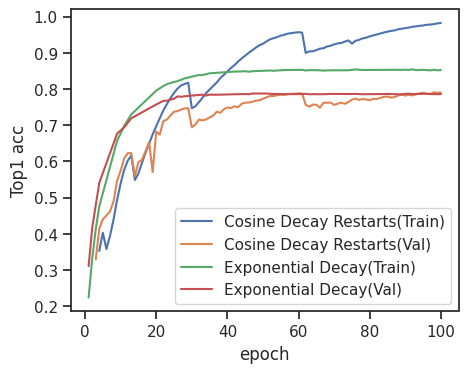

In [9]:
get_fea_df(data, 'Top1 acc')